## Part 3. - Fit Point Tasks


In [2]:
import os, sys
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt

from fastai2.basics import *
from fastai2.vision.all import *

from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

from module.mnist_helpers import build_df, eda_fig_1

##### TODO custom-built arch for BW images


##### TODO look at heads

##### TODO freeze at layers, (we're doing this with fine_tune

##### TODO looking at transfer learning across tasks
Using no pretrained values for body.

### Reproduce Pandas CSV issue
why does the history.csv file keep getting over-written in part2?

In [3]:
path = untar_data(URLs.MNIST_TINY)

df = build_df(path)
df.head(2)
target_names = [   'scalar_pxsum','scalar_top','scalar_bottom',]

db_reg_multi =   DataBlock(blocks=(ImageBlock(cls=PILImageBW), 
                                   RegressionBlock(n_out=3)), 
                       splitter=RandomSplitter(seed=0),
                       get_x=ColReader('fn', pref=path),
                       get_y=ColReader(target_names)
                      )

dls_reg_multi = db_reg_multi.dataloaders(df)

In [18]:
!rm demo.csv

In [19]:
history_fn = 'demo.csv'

learn_reg_multi = cnn_learner(dls_reg_multi, 
                              resnet18, 
                              pretrained=True,
                              cbs = CSVLogger(history_fn)
                             )

In [20]:
with learn_reg_multi.no_logging():
    learn_reg_multi.fit(2)

In [24]:
train_history = pd.read_csv('demo.csv')

display(train_history.head(2))
display(train_history.tail(2))

,epoch,train_loss,valid_loss,time
0,0,234102192.0,225019664.0,00:05
1,1,233519152.0,225031264.0,00:05


,epoch,train_loss,valid_loss,time
0,0,234102192.0,225019664.0,00:05
1,1,233519152.0,225031264.0,00:05


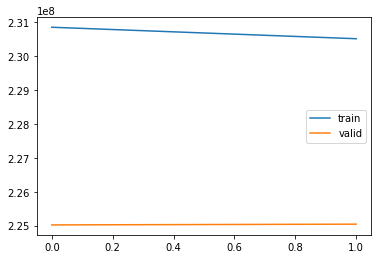

In [13]:
plt.plot(train_history['train_loss'])
plt.plot(train_history['valid_loss']);
plt.legend(['train','valid']);